In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import numpy as np

from data_loader import data_loader
from gain import gain
from utils import rmse_loss

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
miss_rate=0.2 
gain_parameters = {'batch_size': 128,
                   'hint_rate': 0.9,
                   'alpha': 100,
                   'iterations': 10000}

In [3]:
ori_data_x, miss_data_x, data_m = data_loader("spam", miss_rate)

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [5]:
ori_data_x

array([[0.000e+00, 6.400e-01, 6.400e-01, ..., 3.756e+00, 6.100e+01,
        2.780e+02],
       [2.100e-01, 2.800e-01, 5.000e-01, ..., 5.114e+00, 1.010e+02,
        1.028e+03],
       [6.000e-02, 0.000e+00, 7.100e-01, ..., 9.821e+00, 4.850e+02,
        2.259e+03],
       ...,
       [3.000e-01, 0.000e+00, 3.000e-01, ..., 1.404e+00, 6.000e+00,
        1.180e+02],
       [9.600e-01, 0.000e+00, 0.000e+00, ..., 1.147e+00, 5.000e+00,
        7.800e+01],
       [0.000e+00, 0.000e+00, 6.500e-01, ..., 1.250e+00, 5.000e+00,
        4.000e+01]])

In [6]:
miss_data_x

array([[0.000e+00, 6.400e-01, 6.400e-01, ..., 3.756e+00, 6.100e+01,
        2.780e+02],
       [2.100e-01, 2.800e-01,       nan, ...,       nan, 1.010e+02,
        1.028e+03],
       [6.000e-02, 0.000e+00, 7.100e-01, ..., 9.821e+00, 4.850e+02,
        2.259e+03],
       ...,
       [3.000e-01, 0.000e+00, 3.000e-01, ..., 1.404e+00, 6.000e+00,
        1.180e+02],
       [9.600e-01, 0.000e+00, 0.000e+00, ...,       nan, 5.000e+00,
              nan],
       [0.000e+00, 0.000e+00, 6.500e-01, ..., 1.250e+00, 5.000e+00,
        4.000e+01]])

In [7]:
data_m

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [8]:
imputed_data_x = gain(miss_data_x, gain_parameters)


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:17<00:00, 561.25it/s]


In [9]:
imputed_data_x

array([[0.00000000e+00, 6.40000000e-01, 6.40000000e-01, ...,
        3.75600000e+00, 6.10000000e+01, 2.78000000e+02],
       [2.10000000e-01, 2.80000000e-01, 4.13770974e-01, ...,
        1.36377722e+01, 1.01000000e+02, 1.02800000e+03],
       [6.00000000e-02, 0.00000000e+00, 7.10000000e-01, ...,
        9.82100000e+00, 4.85000000e+02, 2.25900000e+03],
       ...,
       [3.00000000e-01, 0.00000000e+00, 3.00000000e-01, ...,
        1.40400000e+00, 6.00000000e+00, 1.18000000e+02],
       [9.60000000e-01, 0.00000000e+00, 0.00000000e+00, ...,
        4.82476950e+00, 5.00000000e+00, 2.35859886e+02],
       [0.00000000e+00, 0.00000000e+00, 6.50000000e-01, ...,
        1.25000000e+00, 5.00000000e+00, 4.00000000e+01]])

In [10]:
col_names=[]
for i in range(ori_data_x.shape[1]):
    col_names.append("col_"+str(i))

In [11]:
data_df = pd.DataFrame(data=ori_data_x,columns=col_names)
data_df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0


In [12]:
miss_data_df = pd.DataFrame(data=miss_data_x,columns=col_names)
miss_data_df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56
0,0.00,0.64,0.64,NaN,0.32,0.00,0.00,0.00,NaN,0.00,...,NaN,0.00,0.000,0.0,0.778,NaN,NaN,3.756,61.0,278.0
1,0.21,0.28,NaN,NaN,0.14,0.28,0.21,0.07,0.00,0.94,...,NaN,0.00,0.132,0.0,0.372,0.180,0.048,NaN,101.0,1028.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,NaN,0.276,0.184,0.010,9.821,485.0,2259.0
3,NaN,NaN,0.00,0.0,0.63,NaN,NaN,0.63,NaN,0.63,...,NaN,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,NaN
4,0.00,0.00,NaN,0.0,NaN,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,NaN,0.135,0.000,0.000,3.537,NaN,191.0


In [13]:
imputed_data_df = pd.DataFrame(data=imputed_data_x,columns=col_names)
imputed_data_df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56
0,0.000000,0.640000,0.640000,0.019033,0.320000,0.00000,0.000000,0.00,0.081602,0.00,...,0.010244,0.00,0.000,0.000000,0.778,0.130232,0.013952,3.756000,61.000000,278.000000
1,0.210000,0.280000,0.413771,0.087082,0.140000,0.28000,0.210000,0.07,0.000000,0.94,...,0.011146,0.00,0.132,0.000000,0.372,0.180000,0.048000,13.637772,101.000000,1028.000000
2,0.060000,0.000000,0.710000,0.000000,1.230000,0.19000,0.190000,0.12,0.640000,0.25,...,0.000000,0.01,0.143,0.001430,0.276,0.184000,0.010000,9.821000,485.000000,2259.000000
3,0.054947,0.130836,0.000000,0.000000,0.630000,0.09335,0.057088,0.63,0.049364,0.63,...,0.012708,0.00,0.137,0.000000,0.137,0.000000,0.000000,3.537000,40.000000,193.703671
4,0.000000,0.000000,0.455961,0.000000,0.450338,0.00000,0.310000,0.63,0.310000,0.63,...,0.000000,0.00,0.135,0.002813,0.135,0.000000,0.000000,3.537000,21.114455,191.000000


In [14]:
def scott_pot(col):
    figure(figsize=(10, 8))
    miss_index = miss_data_df[miss_data_df[col].isna()].index
    impt_data = imputed_data_df.iloc[miss_index]
    data = data_df.iloc[miss_index]
    df = pd.DataFrame(data={"True":data[col],"GAIN":impt_data[col]})
    sns.scatterplot(data=df,x="True",y="GAIN");

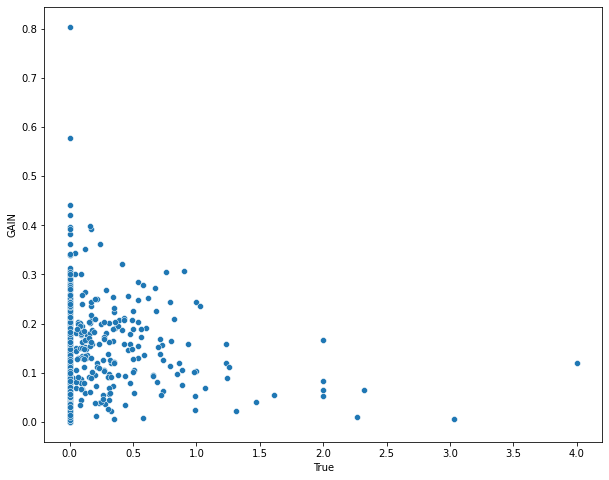

In [15]:
scott_pot('col_0')

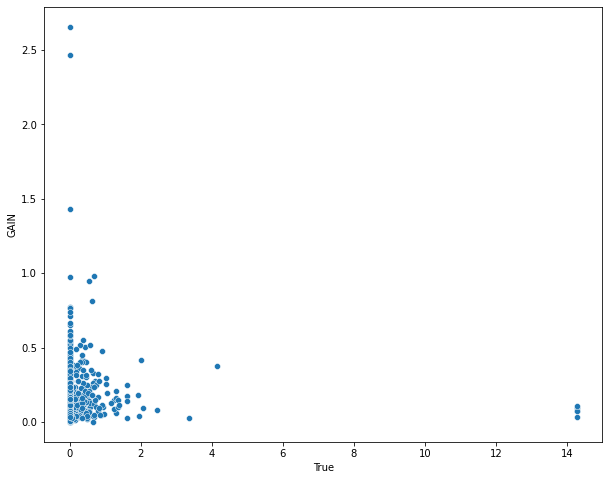

In [16]:
scott_pot('col_1')

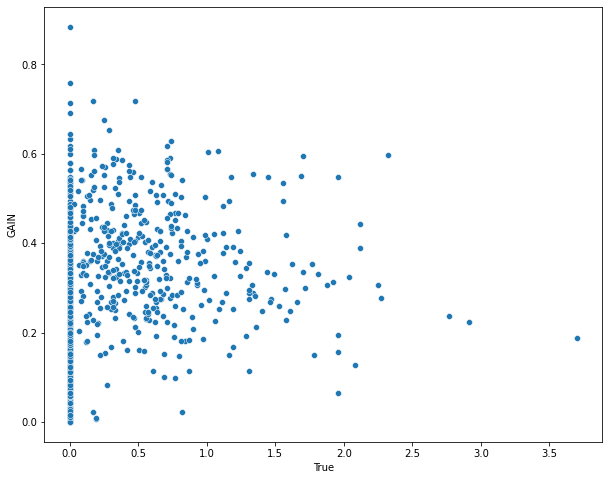

In [17]:
scott_pot('col_2')

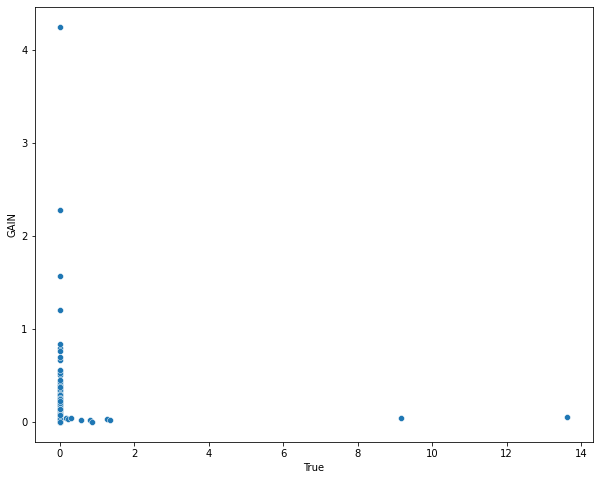

In [18]:
scott_pot('col_3')

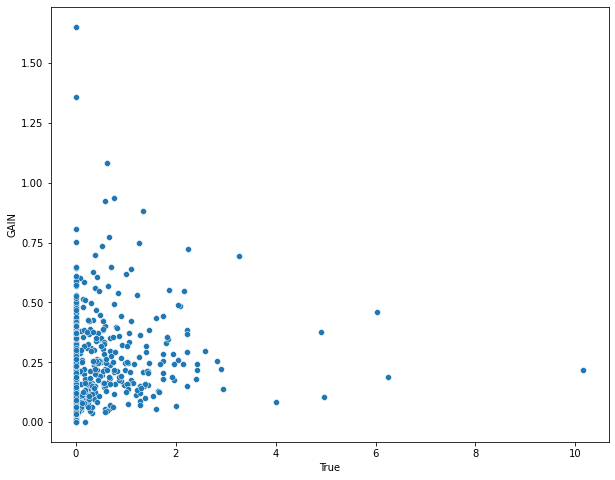

In [19]:
scott_pot('col_15')

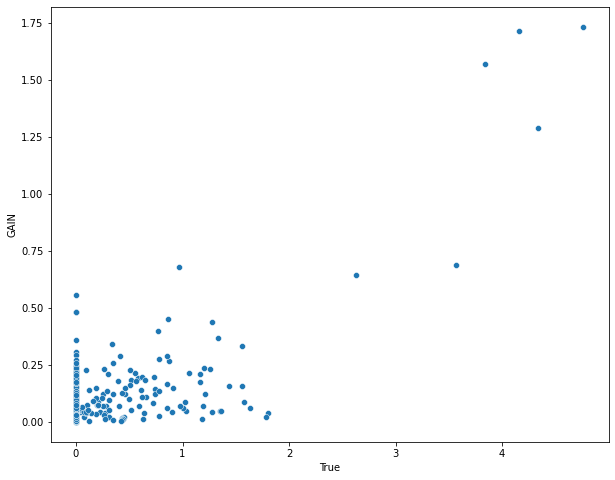

In [20]:
scott_pot('col_35')

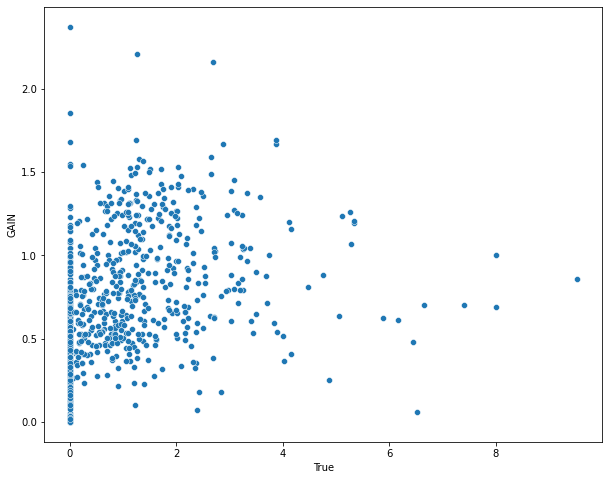

In [21]:
scott_pot('col_20')

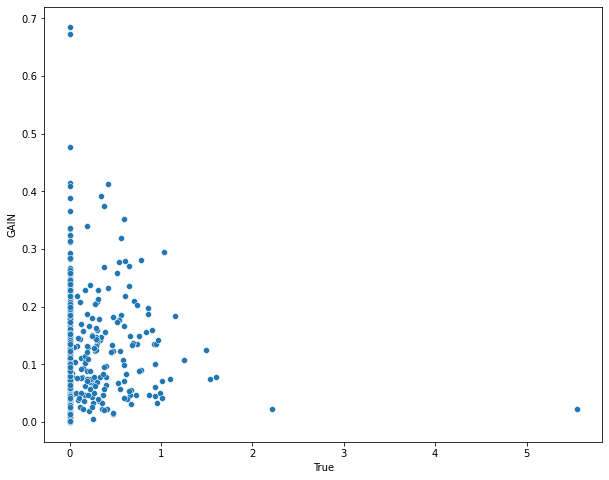

In [22]:
scott_pot('col_12')

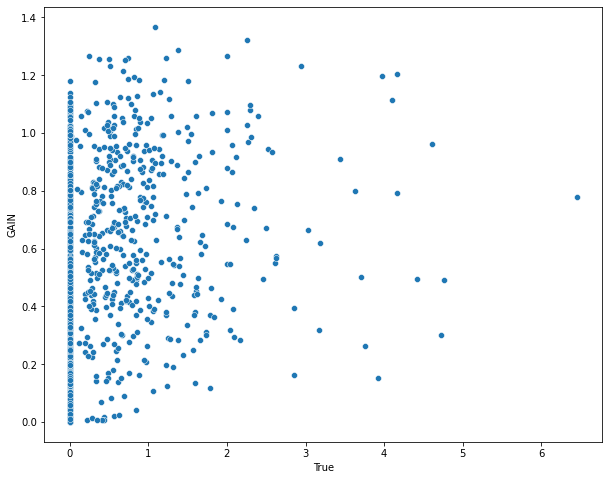

In [23]:
scott_pot('col_11')